## Observations and Insights 

# Three observations:
The initial dataset is composed of 249 unique mice and a total of 1893 rows of treatments, however 5 rows of data concerning mouse g989 are duplicated and the instructions ask us to remove all treatments concerning this mouse, which leaves us with a total of 248 unique mice and 1880 rows of treatments in the clean_data.

-The summary statistics table by drug regimen reveals that there are a total of 10 different group treatments. The mean of the tumor volume per treatment reveals that ramicane and capomulin are the most effective drug regimen at reducing tumor size (~40mm3), whereas ketapril is the least effective (~55mm3).

-The bar chart reveals the total number of treatments per drug regimen. The plot indicates that the two most effective treatments are also the ones that have the most treatment timepoints measured (>228 each). However, they are followed by the least effective treatment, which had 188 treatment measurements. This might indicate that the number of treatments measured is not relevant for the effectiveness of the treatment. The pie chart shows that the gender distribution of the mice tested is fairly even between males and females, so we wouldn't expect the data to be skewed in regards to sex.

-Analysis of the last timepoint for each of the four selected treatments indicates that, when considering only the last timepoint, the average tumor volume of all mice at the end of the treatment regimen was reduced for ramicane, and capomulin (<40mm2), whereas infubinol (despite having mouse ID 'c326' as an outlier) and ceftasmin were not effective at the end of the treatment with a high tumor volume >60mm3. The positive effect of the drug at reducing tumor size over time is clearly represented in the line chart of a representative mouse within the capomulin treatment, since the tumor size reduces as the timepoint of treatment increases.

-Finally, the regression and correlation study shows that there is a strong positive correlation between the weight and the tumor size. This makes sense as the tumor volume will generally contribute to the overall weight of the animal.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

data = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])

# Display the data table for preview
data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
unique_mice_number_data = data["Mouse ID"].nunique()
unique_mice_number_data

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicates = data[data.duplicated(subset = ["Mouse ID","Timepoint"])]['Mouse ID'].unique()
print(duplicates)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = data[(data["Mouse ID"]== duplicates[0])]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data[(data["Mouse ID"] != 'g989')]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice_number_clean_data = clean_data["Mouse ID"].nunique()
unique_mice_number_clean_data

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
summary_treatment = clean_data.groupby("Drug Regimen")['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem', 'count'])
summary_treatment

,mean,median,var,std,sem,count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,148
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Number of Mice per Treatment'}, xlabel='Drug Regimen', ylabel='Number of Mice'>

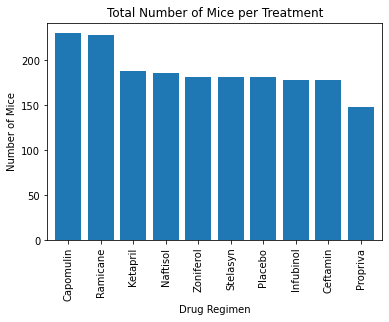

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
summary_treatment['count'].sort_values(ascending=False).plot(kind='bar', xlabel='Drug Regimen', ylabel='Number of Mice', title="Total Number of Mice per Treatment", width=0.8)


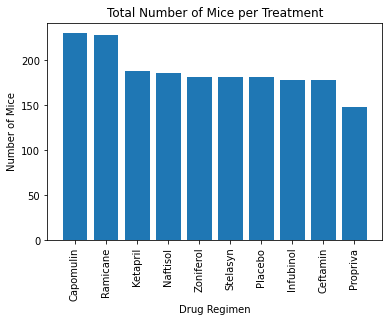

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
number_mice_treatment = clean_data.groupby("Drug Regimen").count()["Mouse ID"].sort_values(ascending=False)
drug_regimen = number_mice_treatment.index
plt.bar(drug_regimen, number_mice_treatment)
plt.xticks(rotation = 90)
plt.title("Total Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

<AxesSubplot:>

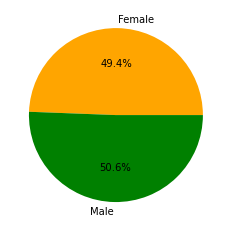

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
summary_gender = data.groupby("Sex")['Drug Regimen'].count()
colors = ["orange", "green"]
summary_gender.plot(kind="pie", colors=colors, autopct="%0.1f%%", ylabel = '')

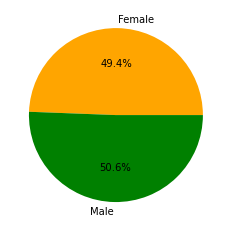

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Female","Male"]
number_mice_treatment = data["Sex"].value_counts().sort_values()
colors = ["orange", "green"]
plt.pie(number_mice_treatment, labels=sex, colors=colors, autopct="%0.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin_data = clean_data[(clean_data['Drug Regimen'] == "Capomulin")]
ramicane_data = clean_data[(clean_data['Drug Regimen'] == "Ramicane")]
infubinol_data = clean_data[(clean_data['Drug Regimen'] == "Infubinol")]
ceftamin_data = clean_data[(clean_data['Drug Regimen'] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse

capomulin_data_last = capomulin_data.drop_duplicates(['Mouse ID'], keep = 'last')
ramicane_data_last = ramicane_data.drop_duplicates(['Mouse ID'], keep = 'last')
infubinol_data_last = infubinol_data.drop_duplicates(['Mouse ID'], keep = 'last')
ceftamin_data_last = ceftamin_data.drop_duplicates(['Mouse ID'], keep = 'last')

In [13]:
capomulin_tumorvol = capomulin_data_last['Tumor Volume (mm3)']
ramicane_tumorvol = ramicane_data_last['Tumor Volume (mm3)']
infubinol_tumorvol = infubinol_data_last['Tumor Volume (mm3)']
ceftamin_tumorvol = ceftamin_data_last['Tumor Volume (mm3)']

In [14]:
# Create a function to calculate the IQR and quantitatively determine if there are any potential outliers.
def print_IQR(name, treatment, data_last):
    quartiles = treatment.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"For the {name} treatment:")
    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
    print(f"The interquartile range is: {iqr}")
    print(f"The the median is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    treatment_outliers = data_last.loc[(
        (data_last['Tumor Volume (mm3)']<= lower_bound) | 
        (data_last['Tumor Volume (mm3)']>= upper_bound))]
    if len(treatment_outliers) == 0:
        print("No outliers found")
    else:
        print("Outliers found:")
        print(treatment_outliers)

In [15]:
print_IQR("capomulin", capomulin_tumorvol, capomulin_data_last)

For the capomulin treatment:
The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range is: 7.781863460000004
The the median is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
No outliers found


In [16]:
print_IQR("ramicane", ramicane_tumorvol, ramicane_data_last)

For the ramicane treatment:
The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile range is: 9.098536719999998
The the median is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
No outliers found


In [17]:
print_IQR("infubinol", infubinol_tumorvol, infubinol_data_last)

For the infubinol treatment:
The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The interquartile range is: 11.477135160000003
The the median is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Outliers found:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
669     c326    Infubinol  Female          18          25          5   

     Tumor Volume (mm3)  Metastatic Sites  
669           36.321346                 0  


In [18]:
print_IQR("ceftamin", ceftamin_tumorvol, ceftamin_data_last)

For the ceftamin treatment:
The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The interquartile range is: 15.577752179999997
The the median is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
No outliers found


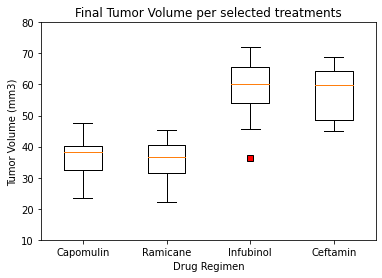

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [capomulin_tumorvol, ramicane_tumorvol, infubinol_tumorvol, ceftamin_tumorvol]
fig1, ax1 = plt.subplots()
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
red_square = dict(markerfacecolor='r', marker='s')
ax1.boxplot(data, flierprops = red_square, labels=labels,)
ax1.set_title('Final Tumor Volume per selected treatments')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
plt.ylim(10,80)
plt.show()

## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

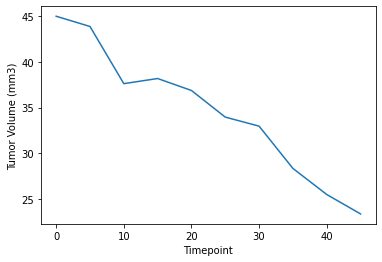

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s185_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == "s185"]
s185_mouse_data.plot("Timepoint", "Tumor Volume (mm3)", ylabel = "Tumor Volume (mm3)", legend = False)

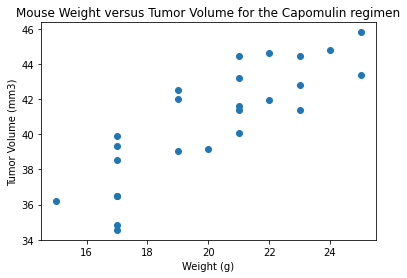

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == "Capomulin"]
weight = capomulin_data.groupby('Mouse ID')["Weight (g)"].mean()
tumor_volume = capomulin_data.groupby('Mouse ID')["Tumor Volume (mm3)"].mean()
weight_vs_tumor_df = pd.merge(weight, tumor_volume, left_index = True, right_index = True)
plt.scatter(weight, tumor_volume)
plt.title("Mouse Weight versus Tumor Volume for the Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84
The r-squared is 0.7088568047708717


Text(20, 37, 'y = 0.95x + 21.55')

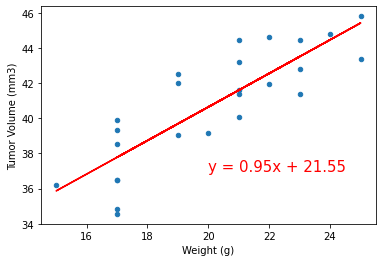

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(weight,tumor_volume)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

slope, intercept, rvalue, pvalue, stderr = st.linregress(weight, tumor_volume)
print(f"The r-squared is {rvalue**2}")

weight_vs_tumor_df['regress_values'] = weight * slope + intercept
regress_values = weight * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plot = weight_vs_tumor_df.plot(kind='scatter', x="Weight (g)", y="Tumor Volume (mm3)")
weight_vs_tumor_df.plot.line(x="Weight (g)", y= 'regress_values', ax=plot, color="red", legend = False)
plt.annotate(line_eq, (20,37), fontsize=15, color='red')
